# MATH 014 (01) – Introduction to Data Science  
## Project 2 – Part 2  
**Department of Mathematics**  
**College of Arts and Sciences, Howard University**  
**Student Name:** Alexandra Zeppeiro  
**Student ID:** @03017718  
**Due Date:** 04-18-2025  

---

## Title: Mapping and Analyzing Black Population Trends Across U.S. States: A Demographic Study

### Introduction  
The "County-Level Demographic: Population, Race, Gender" dataset provides a comprehensive breakdown of demographic information for counties across the United States. Sourced from the U.S. Census Bureau's 2023 American Community Survey (ACS), this dataset includes detailed information on population counts by gender, race, and ethnicity, along with geographic identifiers for each county. The primary purpose of this dataset is to enable researchers, policymakers, and analysts to understand demographic distributions, track trends over time, and support geographic studies. It facilitates data-driven decision-making by providing insights for public policy, urban planning, and social research. The dataset is particularly valuable for demographic analysis, geographic studies, and creating visualizations to explore trends in population diversity across U.S. counties. Its public domain licensing ensures accessibility for a wide range of applications, making it a versatile tool for anyone interested in exploring demographic patterns at the county level.

### Dataset Source  
Dataset obtained from Kaggle: https://www.kaggle.com/datasets/ahmedmohamed2003/county-level-demographic-population-race-gender?resource=download

---

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">IMPORTING LIBRARIES </h2>


In [1224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1225]:
sns.set(style="whitegrid")
%matplotlib inline

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">DATA LOADING (REUSE FROM PART 1) </h2>

In [1227]:
df = pandas.read_csv('demographic_data.csv')
df.head

<bound method NDFrame.head of                    County        State  State FIPS Code  County FIPS Code  \
0          Autauga County      Alabama                1                 1   
1          Baldwin County      Alabama                1                 3   
2          Barbour County      Alabama                1                 5   
3             Bibb County      Alabama                1                 7   
4           Blount County      Alabama                1                 9   
...                   ...          ...              ...               ...   
3217  Vega Baja Municipio  Puerto Rico               72               145   
3218    Vieques Municipio  Puerto Rico               72               147   
3219   Villalba Municipio  Puerto Rico               72               149   
3220    Yabucoa Municipio  Puerto Rico               72               151   
3221      Yauco Municipio  Puerto Rico               72               153   

       FIPS  Total Population  Male Populatio

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">DATA UNDERSTANDING & CLEANING SUMMARY (REUSE FROM PART 1) </h2>

## <span style="color:green"><strong>Understanding the Data</strong></span>

In [1229]:
print("Dataset Shape:", df.shape)
print("\nGeneral Information:")
df.info()

print("\nFirst five rows:")
display(df.head())

print("\nLast five rows:")
display(df.tail())

Dataset Shape: (3222, 12)

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   County                           3222 non-null   object
 1   State                            3222 non-null   object
 2   State FIPS Code                  3222 non-null   int64 
 3   County FIPS Code                 3222 non-null   int64 
 4   FIPS                             3222 non-null   int64 
 5   Total Population                 3222 non-null   int64 
 6   Male Population                  3222 non-null   int64 
 7   Female Population                3222 non-null   int64 
 8   Total Race Responses             3222 non-null   int64 
 9   White Alone                      3222 non-null   int64 
 10  Black or African American Alone  3222 non-null   int64 
 11  Hispanic or Latino               3222 non-null 

,County,State,State FIPS Code,County FIPS Code,FIPS,Total Population,Male Population,Female Population,Total Race Responses,White Alone,Black or African American Alone,Hispanic or Latino
0,Autauga County,Alabama,1,1,1001,59285,28669,30616,59285,43616,11829,2188
1,Baldwin County,Alabama,1,3,1003,239945,117316,122629,239945,198721,19144,13393
2,Barbour County,Alabama,1,5,1005,24757,12906,11851,24757,10891,11616,1490
3,Bibb County,Alabama,1,7,1007,22152,11824,10328,22152,16634,4587,744
4,Blount County,Alabama,1,9,1009,59292,29934,29358,59292,53062,747,5962



Last five rows:


,County,State,State FIPS Code,County FIPS Code,FIPS,Total Population,Male Population,Female Population,Total Race Responses,White Alone,Black or African American Alone,Hispanic or Latino
3217,Vega Baja Municipio,Puerto Rico,72,145,72145,54058,25765,28293,54058,13681,2249,53036
3218,Vieques Municipio,Puerto Rico,72,147,72147,8147,4178,3969,8147,1028,222,7803
3219,Villalba Municipio,Puerto Rico,72,149,72149,21778,10510,11268,21778,7552,2219,21700
3220,Yabucoa Municipio,Puerto Rico,72,151,72151,29868,14381,15487,29868,2001,5900,29732
3221,Yauco Municipio,Puerto Rico,72,153,72153,33509,15920,17589,33509,24597,649,33243


### <span style="color:olive"><strong>What I Did:</strong></span>

The dataset contains detailed demographic information for every county and state in the United States. It is structured with 3,222 rows (one for each county) and 12 columns, capturing data related to population, race, and ethnicity.

The dataset includes the following variables:

- `County`: The name of each county.  
- `State`: The state to which the county belongs.  
- `State FIPS Code`: The Federal Information Processing Standards (FIPS) code for each state.  
- `County FIPS Code`: The FIPS code for each county within the state.  
- `FIPS`: A unique code combining the state and county FIPS codes.  
- `Total Population`: The total population of the county.  
- `Male Population`: The male population of the county.  
- `Female Population`: The female population of the county.  
- `Total Race Responses`: The total number of responses regarding race in the county.  
- `White Alone`: The population of the county identifying as White only.  
- `Black or African American Alone`: The population of the county identifying as Black or African American only.  
- `Hispanic or Latino`: The population of the county identifying as Hispanic or Latino.  

**Data Summary:**

- **Shape:** `(3222, 12)`, indicating 3,222 counties and 12 attributes.  
- **Data Types:**  
  - 10 integer columns (e.g., `State FIPS Code`, `County FIPS Code`, `Total Population`, etc.)  
  - 2 object columns (`County`, `State`)
 
  ___


In [1231]:
print("Descriptive Statistics for Numerical Columns:")
print(df.describe())

Descriptive Statistics for Numerical Columns:
       State FIPS Code  County FIPS Code          FIPS  Total Population  \
count      3222.000000       3222.000000   3222.000000      3.222000e+03   
mean         31.274674        103.216325  31377.890441      1.041721e+05   
std          16.285065        106.560811  16299.548258      3.296689e+05   
min           1.000000          1.000000   1001.000000      4.300000e+01   
25%          19.000000         35.000000  19029.500000      1.098550e+04   
50%          30.000000         79.000000  30022.000000      2.596700e+04   
75%          46.000000        133.000000  46104.500000      6.752625e+04   
max          72.000000        840.000000  72153.000000      9.848406e+06   

       Male Population  Female Population  Total Race Responses   White Alone  \
count     3.222000e+03       3.222000e+03          3.222000e+03  3.222000e+03   
mean      5.154751e+04       5.262457e+04          1.041721e+05  6.580439e+04   
std       1.628260e+05    

### <span style="color:olive"><strong>What I Did:</strong></span>
Despite the average county having about 104,000 people, the median is only around 25,967—indicating that a small number of highly populated counties are skewing the average upward. This shows a right-skewed distribution in total population across counties. Most counties in the U.S. are relatively small, but a few—like those with major cities—have populations in the millions, which pulls the mean much higher than the median.

___

In [1233]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


### <span style="color:olive"><strong>What I Did:</strong></span>
As shown above, there are no missing values in the DataFrame, so I don't need to do anything. If there were missing values, I would drop columns with excessive missing data.

___

## <span style="color:green"><strong>Cleaning Steps Performed</strong></span>

In [1235]:
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


### <span style="color:olive"><strong>What I Did:</strong></span>
As shown above, there are no duplicates in the DataFrame, so I don't need to do anything. Without duplicates, we can proceed with further analysis without the need for data cleaning steps related to redundancy.

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">INDIVIDUAL, COMPARATIVE AND GROUPED VISUALIZATIONS </h2>

1. Create **at least two** of the following:

- A **histogram** or boxplot for a numerical column (e.g., income, score, age, etc.).
- A **bar chart** for a categorical column (e.g., region, department, gender, etc.).
- A **count plot** showing frequency distribution of a key variable.

**Explain**: What does this visualization reveal about the distribution or spread of values?

___
## <span style="color:green"><strong>Histogram of Total Population</strong></span>

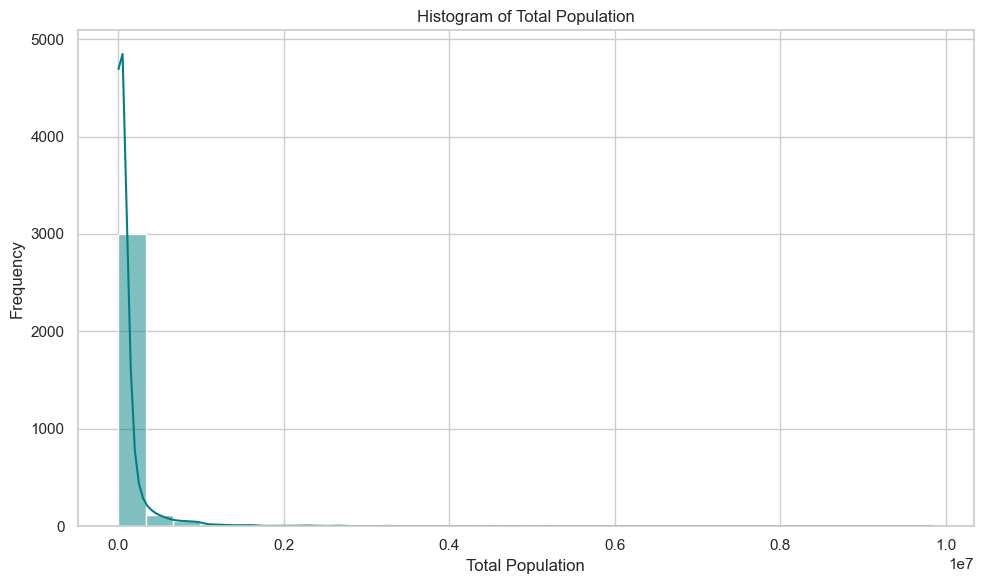

In [1239]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Population'], bins=30, kde=True, color='teal')
plt.title("Histogram of Total Population")
plt.xlabel("Total Population")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### <span style="color:olive"><strong>What I Did:</strong></span>
To understand how total populations are distributed across counties, I created a histogram using the "Total Population" column from the dataset. I used Seaborn’s histplot() function and set the number of bins to 30 to show more detail. This allowed me to visualize how many counties fall into different population size ranges.

### <span style="color:olive"><strong>What Comes From It:</strong></span>
This histogram revealed that most counties have relatively small populations. The data is right-skewed, which means there are a few counties with very large populations (like major cities), but most counties fall on the lower end. This suggests that the average (mean) population is pulled upward by a few large counties, while the typical county (median) is much smaller. This insight helps explain why national averages can sometimes be misleading when counties are so uneven in size.


___
## <span style="color:green"><strong>Bar Chart: Average Population by State</strong></span>

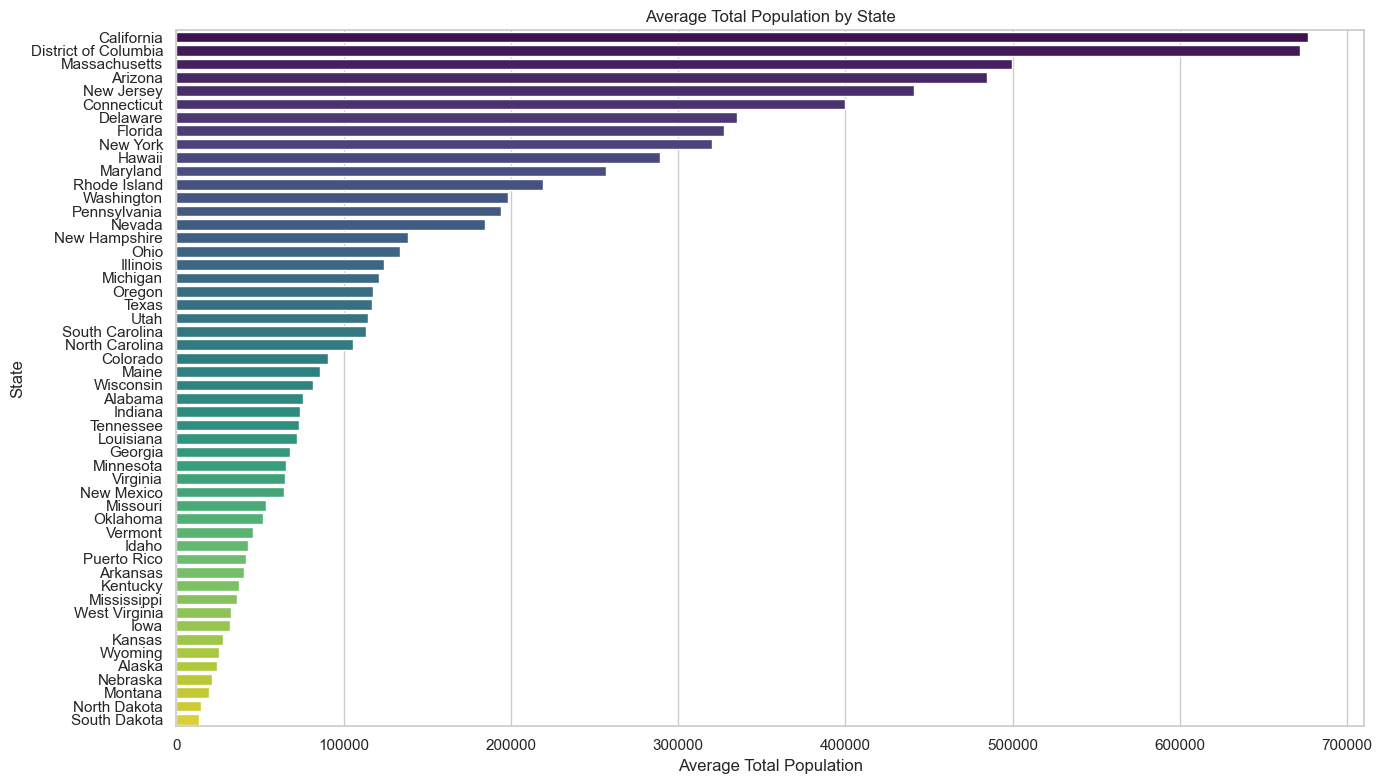

In [1242]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_avg_pop,
    y='State',
    x='Total Population',
    hue='State',          # Add hue (same as y-axis)
    dodge=False,
    legend=False,         # Hide legend
    palette='viridis'
)
plt.title("Average Total Population by State")
plt.xlabel("Average Total Population")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### <span style="color:olive"><strong>What I Did:</strong></span>
To compare how county populations vary by state, I first grouped the data by the "State" column and calculated the average total population for each state using .groupby() and .mean(). I stored the results in a new DataFrame called state_avg_pop.

Then I used Seaborn’s barplot() to create a horizontal bar chart, where each bar shows the average county population for a specific state. I added hue='State' to match the y variable (State) so I could use a color palette without triggering a deprecation warning in Seaborn. I also set dodge=False and legend=False to keep the chart clean and non-redundant.

### <span style="color:olive"><strong>What Comes From It:</strong></span>
This chart revealed that some states were more populous on average than others. For example, California, the District of Columbia, and Florida have significantly higher average populations. On the other hand, states like South Dakota and Alaska had lower average populations.

This visualization helps us understand how population is spread across counties differently depending on the state. Even though two states might have similar total populations, how those people are distributed across counties can be very different. 

___
## <span style="color:green"><strong>Count Plot: Number of Counties per State</strong></span>

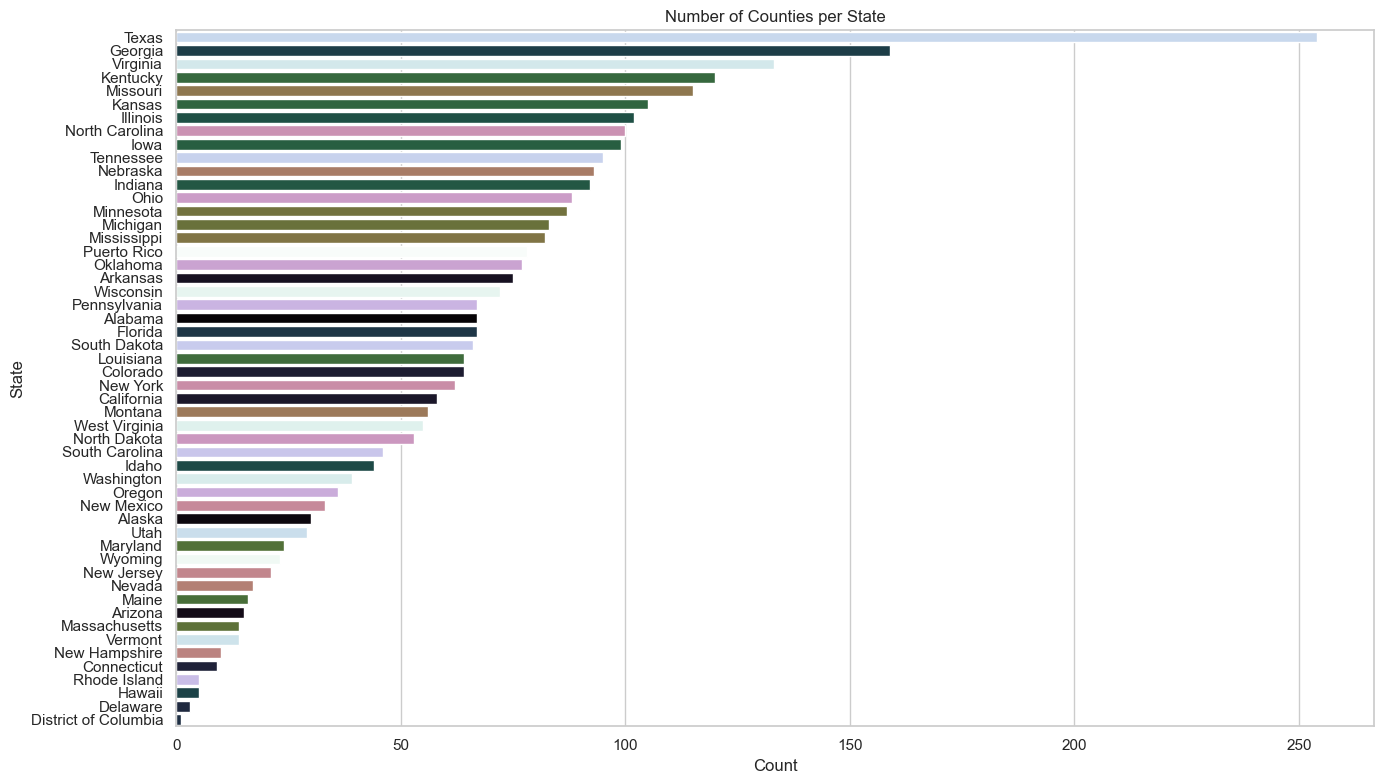

In [1245]:
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df,
    y='State',
    order=df['State'].value_counts().index,
    hue='State',            # Assign hue to y-axis variable
    palette='cubehelix',
    dodge=False,
    legend=False            # Hide the redundant legend
)
plt.title("Number of Counties per State")
plt.xlabel("Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### <span style="color:olive"><strong>What I Did:</strong></span>
To see how many counties each state has in the dataset, I created a count plot using the "State" column. I used Seaborn’s countplot() and sorted the states from most counties to least using .value_counts().index. Each bar represents the number of counties per state, giving a quick way to see how the dataset is structured.

### <span style="color:olive"><strong>What Comes From It:</strong></span>
The count plot showed that Texas has the most counties by far, followed by states like Georgia, Kentucky, and Missouri. On the other end, states like Delaware, Rhode Island, and Hawaii have the fewest counties. This matters because the number of counties affects how much a single state contributes to the overall dataset. It also helps explain why some states show up more often in the visualizations—simply because they have more counties in the data.

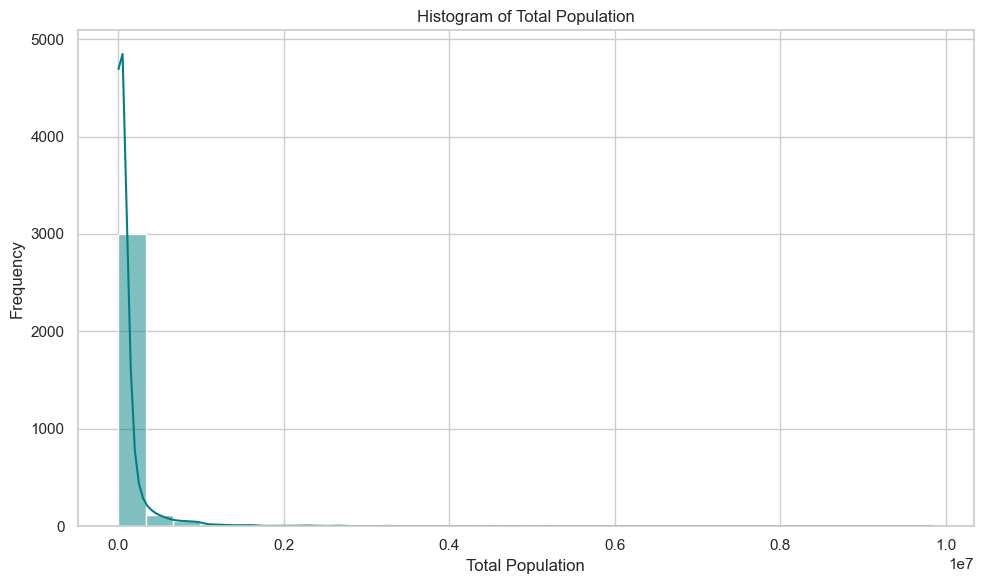

In [1247]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Population'], bins=30, kde=True, color='teal')
plt.title("Histogram of Total Population")
plt.xlabel("Total Population")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Histogram of Total Population**

**What I Did**:
I used sns.histplot() to create a histogram of the Total Population column, which is a numerical variable. This visualization shows the distribution of county populations across the entire dataset.

**What It Reveals**:
The histogram shows that most counties have relatively low populations, clustered toward the left side of the graph. There are fewer counties with very high populations, which appear as a long tail on the right. This indicates a right-skewed distribution, meaning a small number of counties have very large populations while the majority are smaller in size.

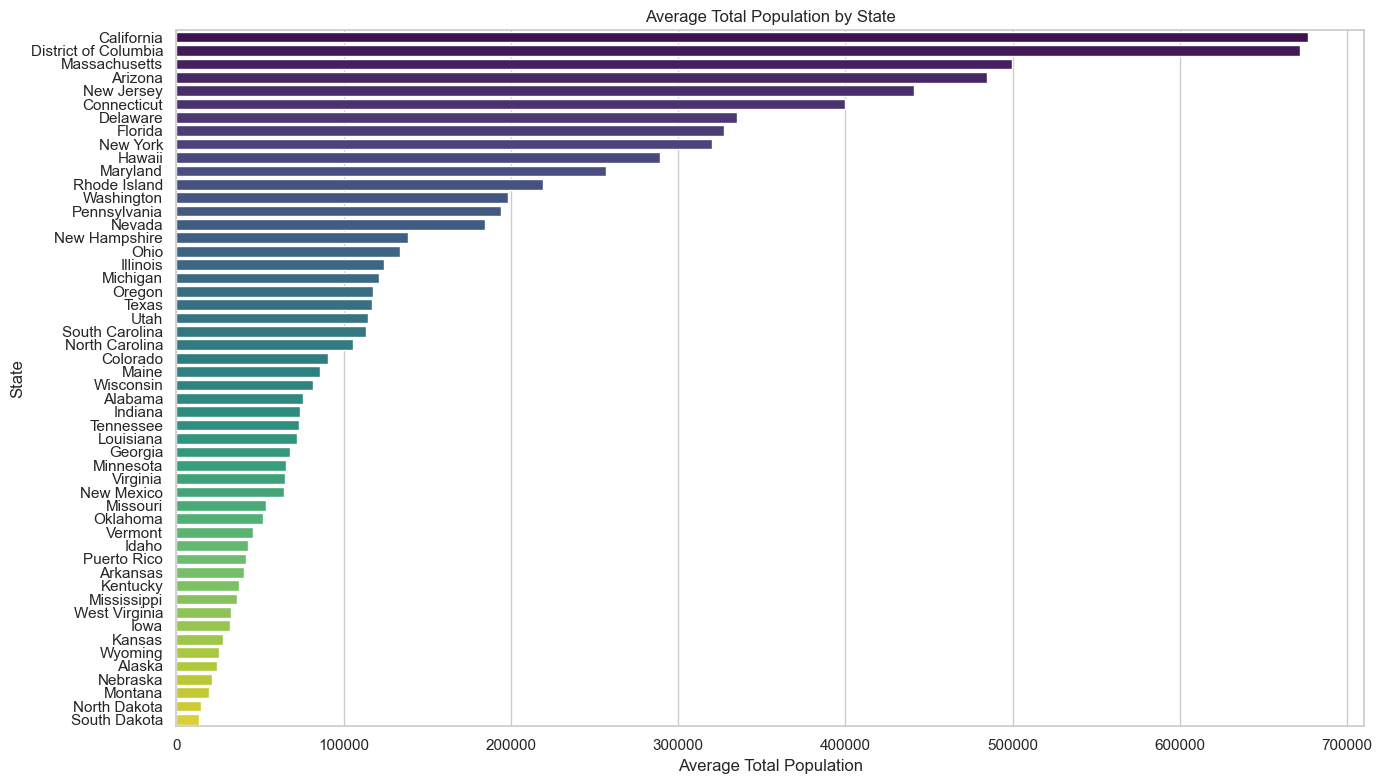

In [1249]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_avg_pop,
    y='State',
    x='Total Population',
    hue='State',          # Add hue (same as y-axis)
    dodge=False,
    legend=False,         # Hide legend
    palette='viridis'
)
plt.title("Average Total Population by State")
plt.xlabel("Average Total Population")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**Bar Chart of Average Population by State**

**What I Did**:
I grouped the data by the State column and calculated the mean of Total Population for each state using .groupby() and .mean(). Then I used sns.barplot() to create a horizontal bar chart, sorted in descending order of average population.

**What It Reveals**:
This bar chart highlights the average county population by state. States like California and the District of Columbia have higher average county populations, while states like Nebraska or Montana have lower averages. This helps identify regional trends in population concentration and suggests that some states have a few very large counties while others are more evenly spread out.

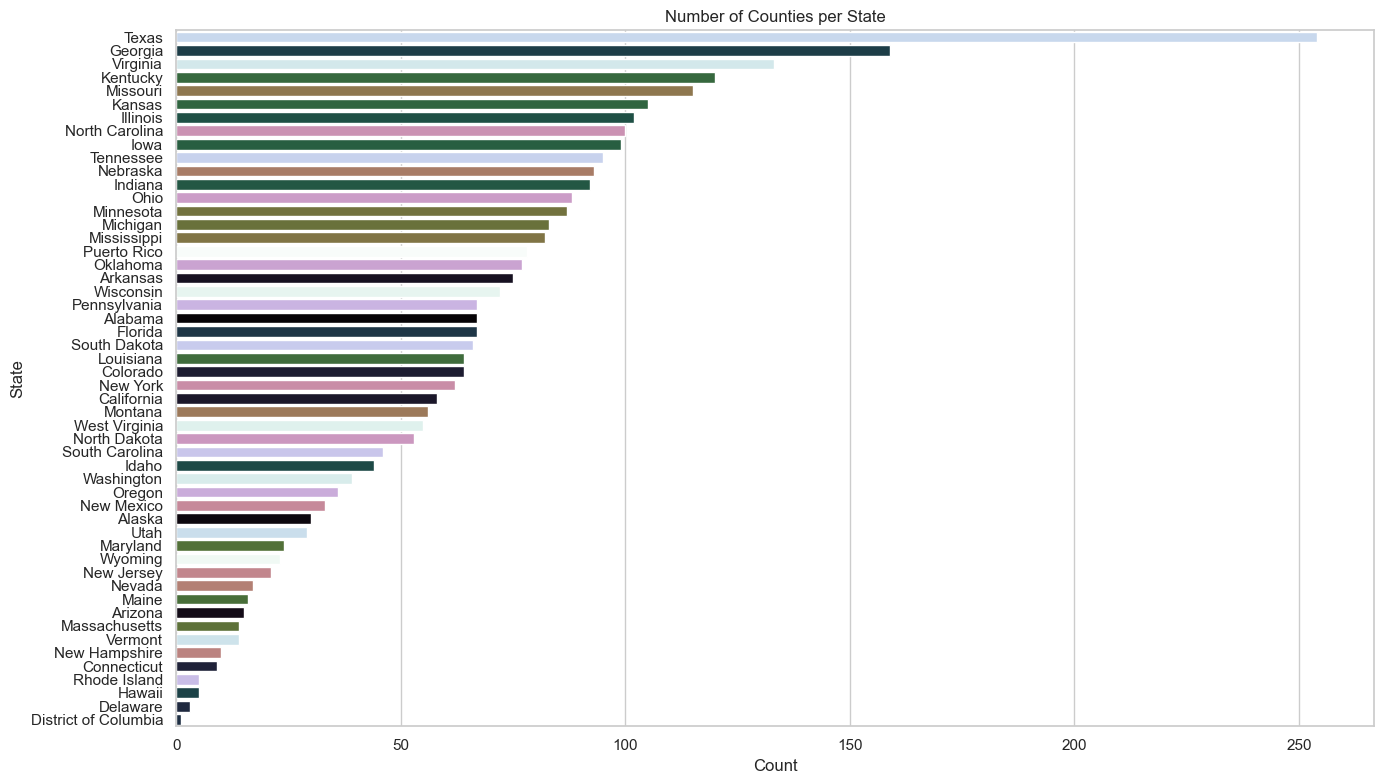

In [1251]:
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df,
    y='State',
    order=df['State'].value_counts().index,
    hue='State',            
    palette='cubehelix',
    dodge=False,
    legend=False           
)
plt.title("Number of Counties per State")
plt.xlabel("Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()


What I Did:
I used sns.countplot() on the State column to count how many counties exist per state. This is a frequency plot for a categorical variable, helping show how many entries (i.e., counties) each state contributes to the dataset.

What It Reveals:
This visualization reveals which states have the most counties in the dataset. For example, states like Texas, Georgia, and Kentucky have many counties, while states like Delaware and Rhode Island have fewer. This gives important context—some states have high total populations spread across many counties, while others have fewer but more populous counties.

--
2. Use .groupby() and visualization to compare across categories:
- A **bar plot** or **line plot** comparing average or total values across categories.

**Explain**: What patterns or differences do you observe among the groups?

 ___
 2. Use .groupby() and visualization to compare across categories:
- A **bar plot** or **line plot** comparing average or total values across categories.

**Explain**: What patterns or differences do you observe among the groups?
## <span style="color:green"><strong>Bar Plot: Average Black Population by State</strong></span>

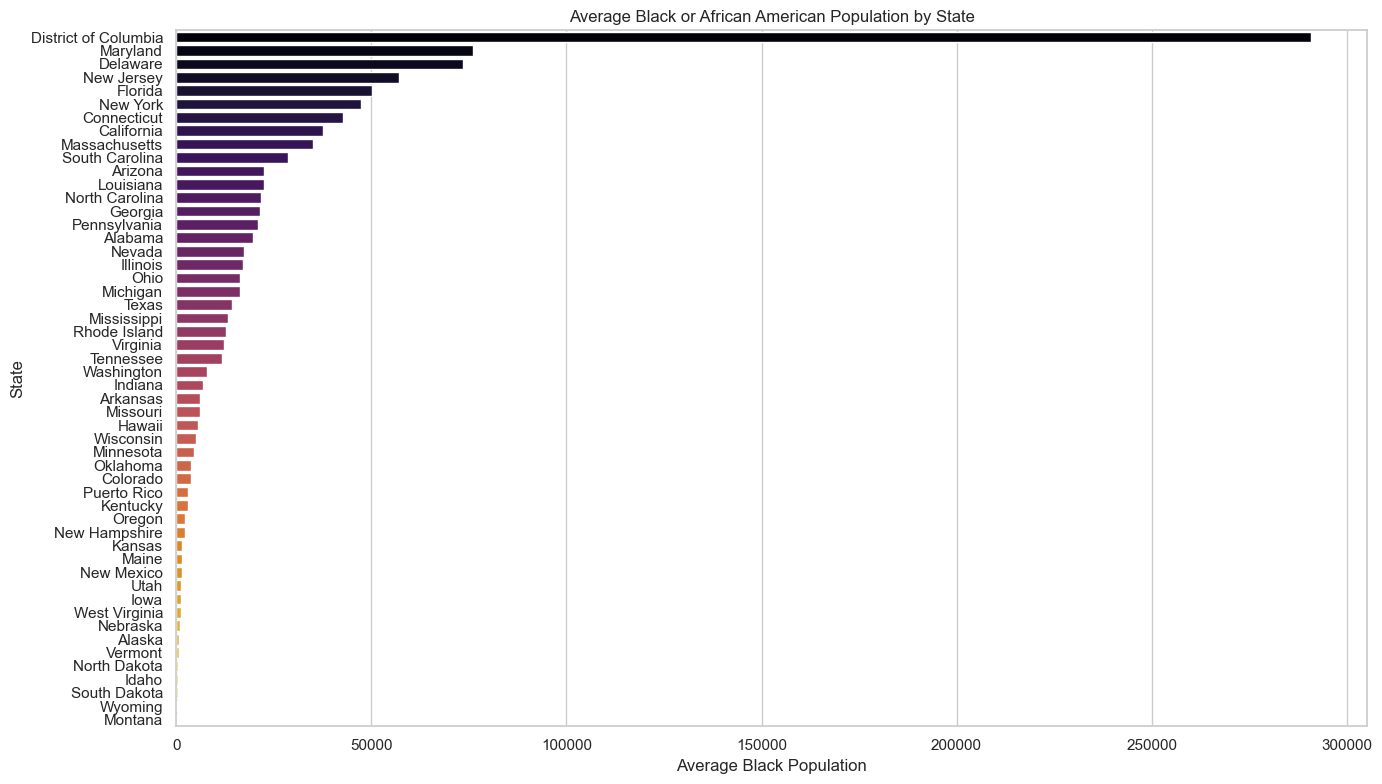

In [1255]:
avg_black = df.groupby("State")["Black or African American Alone"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_black,
    x="Black or African American Alone",
    y="State",
    hue="State",
    dodge=False,
    legend=False,
    palette="inferno"
)
plt.title("Average Black or African American Population by State")
plt.xlabel("Average Black Population")
plt.ylabel("State")
plt.tight_layout()
plt.show()

___
## <span style="color:green"><strong>Bar Plot: Average White Population by State</strong></span>

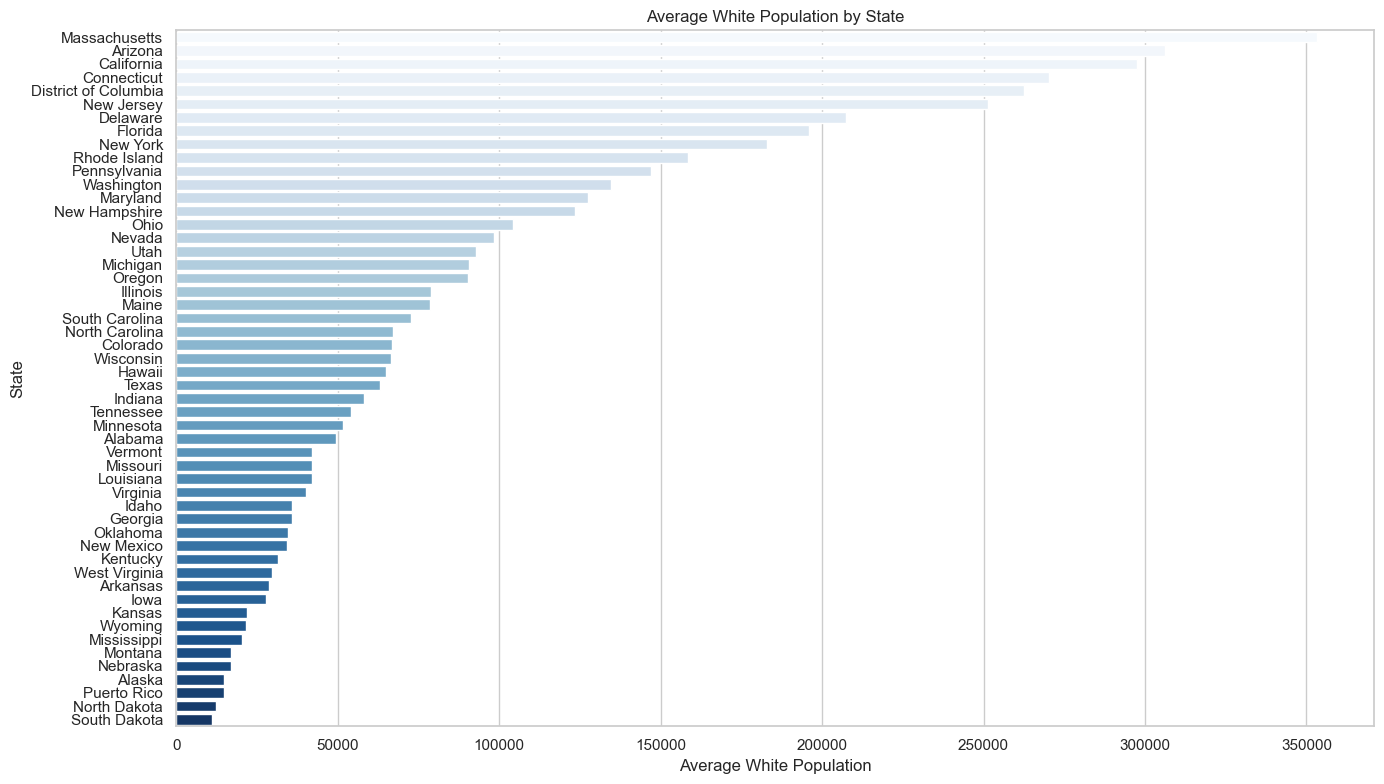

In [1257]:
avg_white = df.groupby("State")["White Alone"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_white,
    x="White Alone",
    y="State",
    hue="State",
    dodge=False,
    legend=False,
    palette="Blues"
)
plt.title("Average White Population by State")
plt.xlabel("Average White Population")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### <span style="color:olive"><strong>What I Did:</strong></span>
I used the .groupby() function on the State column to calculate the average Black and White populations per state. Then, I used sns.barplot() to visualize these averages.

### <span style="color:olive"><strong>What Comes From It:</strong></span>

- States like the District of Columbia, Maryland, and New Jersey tend to have higher average Black populations per county.

- States like Massachusetts and Florida have higher average White populations, likely due to large total populations.

These visualizations reveal how racial demographics are distributed differently across states, and support the idea that some regions have more concentrated Black populations, even if their overall numbers aren't the highest.

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">RELATIONSHIP VISUALIZATIONS </h2>

Use visualizations that reveal relationships between two numerical or mixed variables:  
• A scatter plot.  
• A heatmap of correlations.  

**Explain:** Do you observe trends, correlations, or outliers?


___

## <span style="color:green"><strong>Heatmap / Bar Chart of Black Population by State</strong></span>

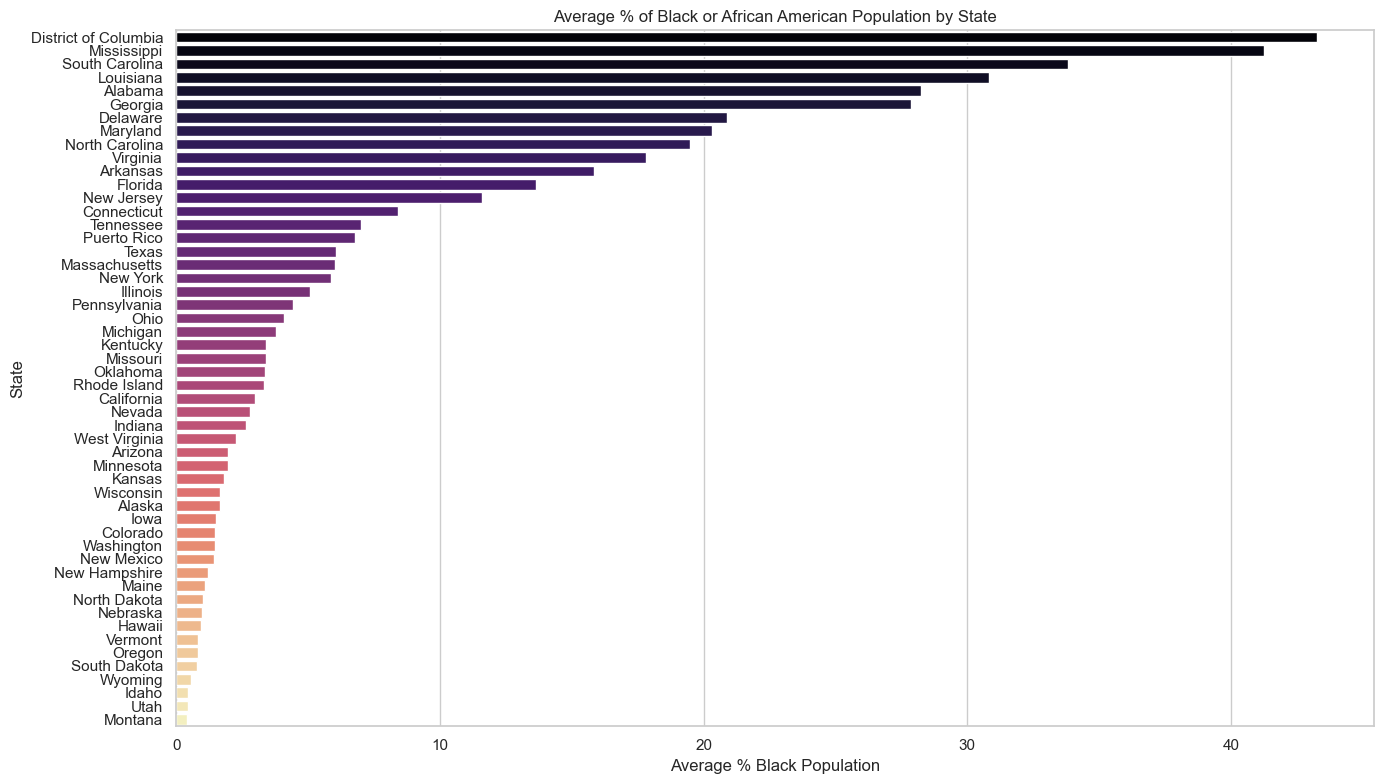

In [1261]:
df_copy = df.copy()
df_copy['Black Percentage'] = (df_copy['Black or African American Alone'] / df_copy['Total Population']) * 100

state_black_avg = df_copy.groupby('State')['Black Percentage'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_black_avg,
    x='Black Percentage',
    y='State',
    palette='magma',
    hue='State',
    dodge=False,
    legend=False
)
plt.title("Average % of Black or African American Population by State")
plt.xlabel("Average % Black Population")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### <span style="color:olive"><strong>What I Did:</strong></span>
To understand how the Black or African American population is distributed across states, I first created a new column called **"Black Percentage"** by dividing the number of Black or African American residents in each county by that county’s total population. I multiplied the result by 100 to get the percentage.

Then, I used `.groupby()` to group the data by **"State"** and calculated the average Black population percentage for each state. I sorted these values in descending order to make the chart easier to interpret.

Finally, I used Seaborn’s `barplot()` function to create a horizontal bar chart, where each bar represents a state and the length corresponds to its average percentage of Black residents. I used a color palette to enhance visual distinction and set the `hue` to match the state variable to avoid Seaborn’s warning about deprecated palette usage.

### <span style="color:olive"><strong>What Comes From It:</strong></span>
This visualization reveals clear regional differences in the average proportion of Black or African American residents across U.S. states. For example:

- The **District of Columbia**, **Mississippi**, and **Louisiana** have the highest average percentages of Black residents per county.
- States in the **Northeast and West**, such as **Vermont**, **Idaho**, and **Montana**, show very low percentages.

These trends highlight the lasting impact of historical migration patterns, segregation, and regional socio-economic development on today’s demographic distribution.


___

## <span style="color:green"><strong>Scatter Plot of Total Population vs. Black-to-White Ratio</strong></span>


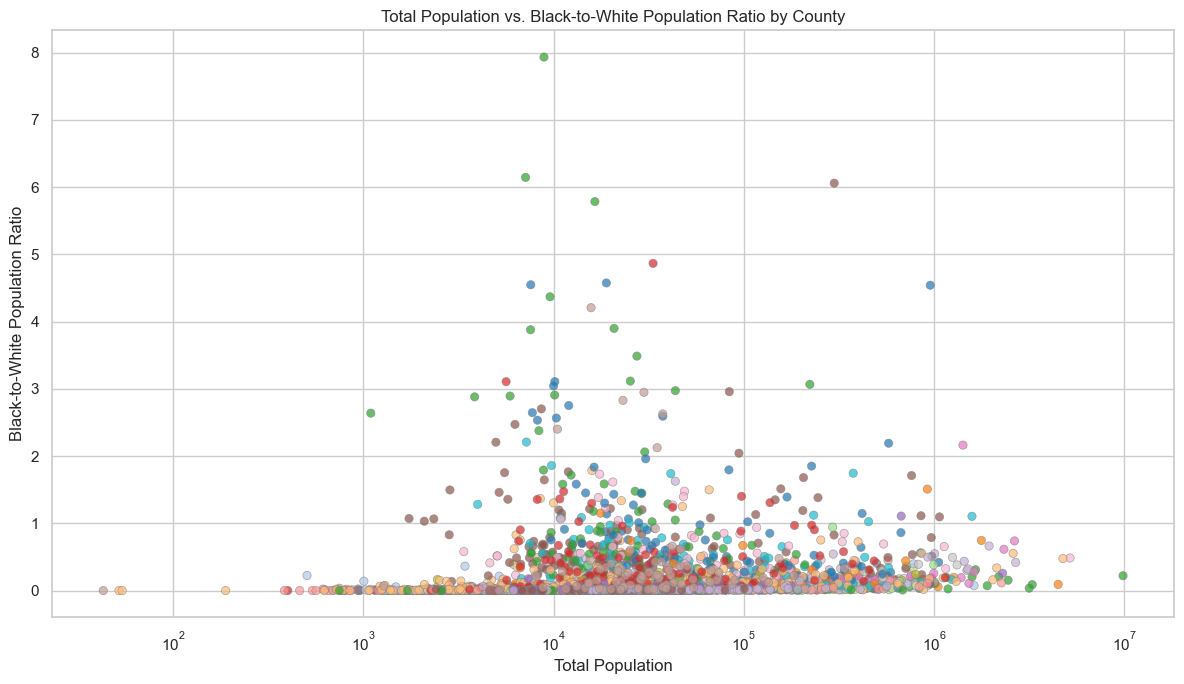

In [1265]:
df_copy['White Percentage'] = (df_copy['White Alone'] / df_copy['Total Population']) * 100
df_copy['Black-to-White Ratio'] = df_copy['Black or African American Alone'] / df_copy['White Alone']

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_copy,
    x='Total Population',
    y='Black-to-White Ratio',
    hue='State',
    palette='tab20',
    alpha=0.7,
    edgecolor='gray',
    legend=False
)
plt.title("Total Population vs. Black-to-White Population Ratio by County")
plt.xlabel("Total Population")
plt.ylabel("Black-to-White Population Ratio")
plt.xscale('log')  # helps visualize wide ranges
plt.tight_layout()
plt.show()


### <span style="color:olive"><strong>What I Did:</strong></span>
To investigate the relationship between a county’s total population and its racial composition, I created a new variable called **"Black-to-White Ratio"**. I calculated this by dividing the Black or African American population by the White population for each county. This ratio allowed me to see whether Black residents outnumber White residents or vice versa in different counties.

I then used Seaborn’s `scatterplot()` function to plot **Total Population** on the x-axis and the **Black-to-White Ratio** on the y-axis. I added the `hue='State'` argument so that each dot would be color-coded by state, helping to show any regional clustering. Because population numbers vary widely (some counties have just a few thousand residents, others have millions), I used a **logarithmic scale** for the x-axis to improve readability and avoid distortion.

### <span style="color:olive"><strong>What Comes From It:</strong></span>
This scatter plot reveals several key insights:

- Counties with **very small populations** often have **higher Black-to-White ratios**, sometimes above 1, meaning they have more Black residents than White.
- In contrast, **large counties** tend to have **lower Black-to-White ratios**, likely because of more diverse racial compositions or larger White majorities.
- There is **no clear linear trend**, but some **regional clustering** is visible, where states with high Black populations form a loose vertical band in the scatter space.

This visualization shows how racial demographics vary not just by region, but also in relation to **population size**—raising questions about the **concentration of racial groups in urban vs. rural areas** and the legacy of **segregation, migration, and development**.
